In [1]:
from SeismicReduction import *
import pickle

In [2]:
### Client loader
# set_seed(42)
# dataholder = DataHolder("Glitne", [1300, 1502, 2], [1500, 2002, 2])
# dataholder.add_near('./data/3d_nearstack.sgy');
# dataholder.add_far('./data/3d_farstack.sgy');
# dataholder.add_horizon('./data/Top_Heimdal_subset.txt')

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [3]:
### Processor
processor = Processor(dataholder)
input1 = processor([True, 4, 4], normalise=True)

Processor has created an output with shape:  (25351, 2, 8)


In [4]:
## PCA
# pca = PcaModel(input1)
# pca.reduce(3)
# pca.to_2d(umap_neighbours=5, umap_dist=0.1, verbose=False)

In [5]:
# umap = UmapModel(input1)
# umap.reduce()
# umap.to_2d(10, 0.1)

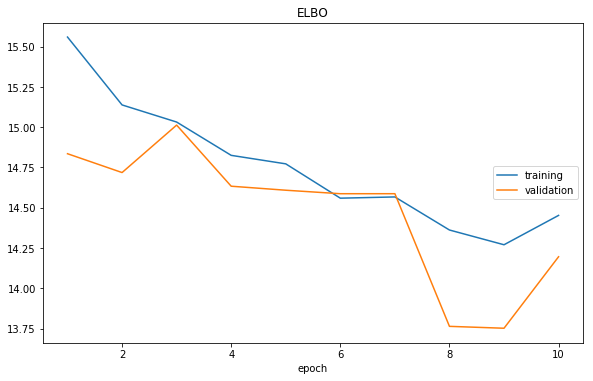

ELBO:
training   (min:   14.270, max:   15.559, cur:   14.453)
validation (min:   13.753, max:   15.013, cur:   14.196)
NOTE: embedding already reduced to 2D latent space, UMAP will not be run


In [6]:
vae = VaeModel(input1)
vae.reduce(epochs=10, hidden_size=2, lr=0.01, recon_loss_method='mse', plot_loss=True)
vae.to_2d(20, 0.1)

In [7]:
# bvae = BVaeModel(input1)
# bvae.reduce(epochs=10, hidden_size=2, lr=0.01, beta=5, plot_loss=True)
# bvae.to_2d(20, 0.1)

In [8]:
# plot_agent(pca, 'horizon')

In [9]:
# plot_agent(umap)

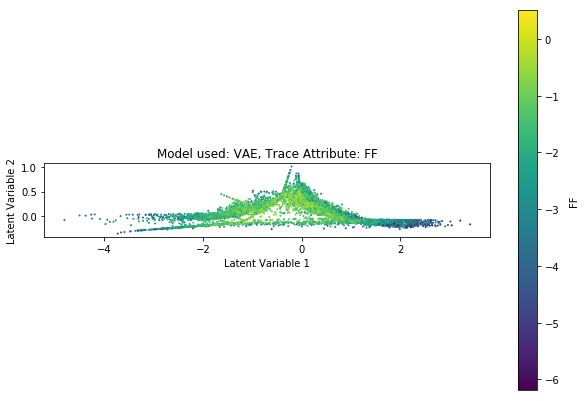

In [10]:
plot_agent(vae)

In [11]:
# plot_agent(bvae, 'horizon')

In [12]:
# vae.save_nn('./saved_nn/vae1')

In [13]:
# loaded = VaeModel(input1)
# loaded.load_nn('./saved_nn/vae1')
# loaded.reduce()

In [14]:
# loaded.to_2d()

In [15]:
# plot_agent(loaded)

In [16]:
samples = 1000
vec_length = 10
recon = torch.rand((samples,2,vec_length), requires_grad=True)
in1 = torch.rand((samples,2,vec_length))


In [17]:
# print(in1.)

In [18]:
criterion_mse = nn.MSELoss(size_average=False)

MSE = criterion_mse(recon, in1)

dist = torch.dist(recon, in1)

man_mse = np.sum( np.power(recon.detach().numpy() - in1.detach().numpy(), 2) )

bce = nn.functional.binary_cross_entropy(recon, in1, size_average=False)


print('MSE:', MSE.item(), '\n',
      'dist', dist.item(), '\n',
      'man_mse', man_mse, '\n',
      'bce', man_mse, '\n',
)

np.power(recon.detach().numpy() - in1.numpy(), 2).shape

MSE: 3341.939697265625 
 dist 57.80949783325195 
 man_mse 3341.94 
 bce 3341.94 



/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


(1000, 2, 10)